## Data Analysis and Statistical Hypothesis of Physicochemical Properties in Red Wine Samples from Vinho Verde, Portugal
*Author: Karina Cramer*

2025-03-12

## 1. Introduction

#### 1.a Case Study Motivation

  Wines are originally alcoholic beverages obtained from total or partial fermentation of fruits specially of grape. The wine industry is a growing industry. “The U.S. wine market size was estimated at USD 81.33 billion in 2023 and is expected to expand at a CAGR of 5.4% from 2024 to 2030 (Grand View Research, 2024).

  While wine preferences are subjective and vary by individual sensory perception, wine quality is influenced by measurable physicochemical properties. But do these physicochemical factors significantly impact sensory wine tasting? Understanding these relationships can help winemakers optimize production and improve overall wine quality (Cortez et al., 2009). 
  
####  1.b Objective

  This case study aims to conduct statistical hypothesis testing to evaluate whether specific physicochemical attributes influence sensory wine tasting. Using Welch’s t-test in R, along with the Benjamini-Hochberg (BH) correction method for multiple hypothesis testing, we will analyze differences in physicochemical properties between wines rated 3 and 4 (lower quality) and 7 (higher quality).

  The goal is to perform data analysis and statistical testing on the Vinho Verde red wines dataset and determine whether there are significant differences in the following physicochemical attributes: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol.

  To achieve this, we will approach the null hypothesis (H₀), which assumes no significant difference in physicochemical properties, and the alternative hypothesis (H₁), which posits that there is a significant difference. If the statistical tests indicate a p-value less than 0.05, the null hypothesis will be rejected, providing evidence for a difference in the physicochemical properties of wines rated differently and suggesting a potential influence on sensory wine tasting. Additional visualizations will be presented using boxplots for easier interpretation.


##  2. Data 

####  2.a Data Source:

This study uses as samples of Vinho Verde, red wine products from the Minho (northwest) region of Portugal  (Cortez et al., 2009).

   The data were collected from May/2004 to February/2007 using only protected designation of origin samples that were tested at the official certification entity (CVRVV). The CVRVV is an inter-professional organization with the goal of improving the quality and marketing of vinho verde. The data were recorded by a computerized system (iLab), which automatically manages the process of wine sample testing from producer requests to laboratory and sensory analysis. Each entry denotes a given test (analytical or sensory) and the final database was exported into a single sheet (.csv) (Cortez et al., 2009).

####   2b Original collected Data Structure:

 The Data Frame of red wine was stored in a Tibble format with numeric columns. It includes; Rows: 1,599 and Columns: 12. The physicochemical attributes selected for the analyses include:

 fixed acidity    
volatile acidity
citric acid         
residual sugar     
chlorides         
free sulfur dioxide 
total sulfur dioxide
density          
pH                 
sulphates    
alcohol     
quality

 Regarding the quality, each sample was evaluated by a minimum of three sensory assessors (using blind tastes), which graded the wine on a scale that ranges from 0 (very bad) to 10 (excellent). The final quality value score was given by the median of those 3 evaluations.  In this case the study selected only samples that had significant differences in quality values. Taking in consideration that there were no results lower then 3 and higher then 7. Quality values selected were the lowest of 3 and 4 and highwest of 7. The decision of two ranges for lowest quality was also based on the amount of data entries for each quality and with the purpose to decrease sample size difference.
 
#### 2.b Data Limitations:

  The dataset has several limitations that may affect the depth of analysis:
  
#### Grape and Harvest Information:
 The dataset does not include details about the type of grape used or information on the harvest year. These factors are known to influence wine quality, and their absence may limit the ability to fully understand the relationship between physicochemical properties and wine quality.


##### Absence of Expert Sensory Insights:
 The dataset does not contain subjective sensory evaluations or expert insights, which could provide valuable context for understanding the sensory aspects of wine quality. This limitation means that the analysis will be based solely on the objective physicochemical factors and not on how experts or consumers perceive quality.


##### Limited Quality Range:
 The dataset contains a range of quality scores, but it may not fully represent the extremes of wine quality (e.g., very low or very high scores), which could skew certain findings or limit the generalizability of results.

##### Relation between the physicochemical attributes
  The focus of this case study is based on the data Statistical hypothesis of each individual physicochemical with the two different quality groups . No further study for the relation between each physicochemical to one another was made. 
 
## 3. Methodology

#### 3.a Approach:

After filtering and cleaning, this study will employ statistical hypothesis testing with two hypotheses for each physicochemical property based on the final p-value results:

##### Null Hypothesis (H₀):
There is no significant difference in the physicochemical properties between wines rated 3, 4, and 7.

##### Alternative Hypothesis (H₁):
There is a significant difference in the physicochemical properties between wines rated 3, 4, and 7.

#### 3.b Statistical Tests:

##### Welch’s t-test:
  Welch’s t-test is chosen because it is robust to unequal variances between the groups, which is important since we are comparing wines that may have different variances in their physicochemical properties. This makes it a more reliable choice than the standard t-test, which assumes equal variances.

##### Benjamini-Hochberg (BH) Correction:
  The Benjamini-Hochberg (BH) correction is applied to control the false discovery rate (FDR) when performing multiple hypothesis tests. Since we are testing multiple physicochemical properties, the BH correction helps to minimize the likelihood of Type I errors (false positives), providing a more accurate overall result.

##  4. Analysis


#### Vizualing the data 

In [1]:

#Accessing libraries
library(tidyverse)
library(ggplot2)
library(dplyr)
library(readr)
library(DT)
library(tibble)

# acessing the data
wine_case_study <- read_delim("/kaggle/input/red-wine-data/winequality-red.csv", 
                              delim = ";", show_col_types = FALSE)
glimpse(wine_case_study)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 1,599
Columns: 12
$ `fixed acidity`        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7…
$ `volatile acidity`     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0.600…
$ `citric acid`          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00,…
$ `residual sugar`       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.…
$ chlorides              <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069…
$ `free sulfur dioxide`  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 17, …
$ `total sulfur dioxide` <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65, 10…
$ density                <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.9978,…
$ pH                     <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39,…
$ sulphates              <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0.47,…
$ alcohol                <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, 1…
$ quality                <dbl> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5,…


#### 4.a Data Filtering:

##### The Original dataframe was filtered into two new dataframes to present only 3, 4 and 7 on the quality column 


In [2]:

#Filtering my data for lower (3,4) and higher (7)  quality only

wine_low_quality <- wine_case_study %>%
  filter(quality %in% c(3, 4))
datatable(wine_low_quality)

wine_high_quality <- wine_case_study %>%
  filter(quality == 7)

datatable(wine_high_quality)



HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

##### The new filtered dataframes was combine in one new dataframe and added a new column as quality_group with a lower qualidade and higher quality type

In [3]:
wine_case_study <- read_delim("/kaggle/input/red-wine-data/winequality-red.csv", 
                              delim = ";", show_col_types = FALSE)
#creating combined dataframe
wine_case_study <- bind_rows(
  wine_low_quality %>% mutate(quality_group = "Lower Quality"),
  wine_high_quality %>% mutate(quality_group = "Higher Quality")
)
datatable(wine_case_study)


HTML widgets cannot be represented in plain text (need html)

##### Cheking missing for missing values

In [4]:

# Check the total number of NAs in the entire dataset
sum(is.na(wine_case_study))

# Check the number of NAs per column
colSums(is.na(wine_case_study))


[1] 0

fixed acidity     volatile acidity          citric acid 
                   0                    0                    0 
      residual sugar            chlorides  free sulfur dioxide 
                   0                    0                    0 
total sulfur dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0 
       quality_group 
                   0

#### Checking unique entries eliminating  duplicates


In [5]:

wine_case_study_clean <- unique(wine_case_study)
datatable(wine_case_study_clean)

# The dataset had 230 uniques entries  

HTML widgets cannot be represented in plain text (need html)

##### Adjusting data


In [6]:

#Transforming the columns quality_group into factor for statistical purposes.
wine_case_study_clean <- wine_case_study %>%
  mutate(quality_group = as.factor(quality_group))
sapply(wine_case_study_clean, class)

fixed acidity     volatile acidity          citric acid 
           "numeric"            "numeric"            "numeric" 
      residual sugar            chlorides  free sulfur dioxide 
           "numeric"            "numeric"            "numeric" 
total sulfur dioxide              density                   pH 
           "numeric"            "numeric"            "numeric" 
           sulphates              alcohol              quality 
           "numeric"            "numeric"            "numeric" 
       quality_group 
            "factor"

#### 1- Fixed Acidity Welch’s t-test and Visualization



	Welch Two Sample t-test

data:  fixed acidity by quality_group
t = 3.9838, df = 124.23, p-value = 0.0001148
alternative hypothesis: true difference in means between group Higher Quality and group Lower Quality is not equal to 0
95 percent confidence interval:
 0.5036483 1.4982182
sample estimates:
mean in group Higher Quality  mean in group Lower Quality 
                    8.872362                     7.871429 


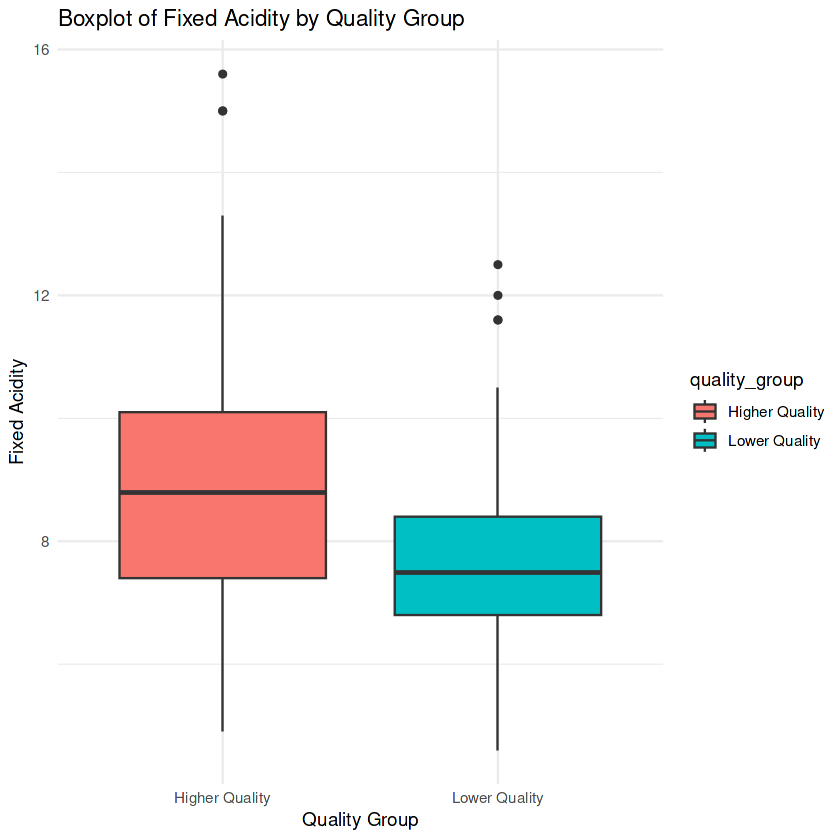

In [7]:
t.test(`fixed acidity` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)

ggplot(wine_case_study_clean, aes(x = quality_group, y = `fixed acidity`, fill = quality_group)) +
  geom_boxplot() +
  labs(title = "Boxplot of Fixed Acidity by Quality Group", x = "Quality Group", y = "Fixed Acidity") +
  theme_minimal()

#### 3- cCitric Acid Welch’s t-test and Visualization



	Welch Two Sample t-test

data:  citric acid by quality_group
t = 6.8214, df = 98.901, p-value = 7.259e-10
alternative hypothesis: true difference in means between group Higher Quality and group Lower Quality is not equal to 0
95 percent confidence interval:
 0.1429049 0.2601453
sample estimates:
mean in group Higher Quality  mean in group Lower Quality 
                   0.3751759                    0.1736508 


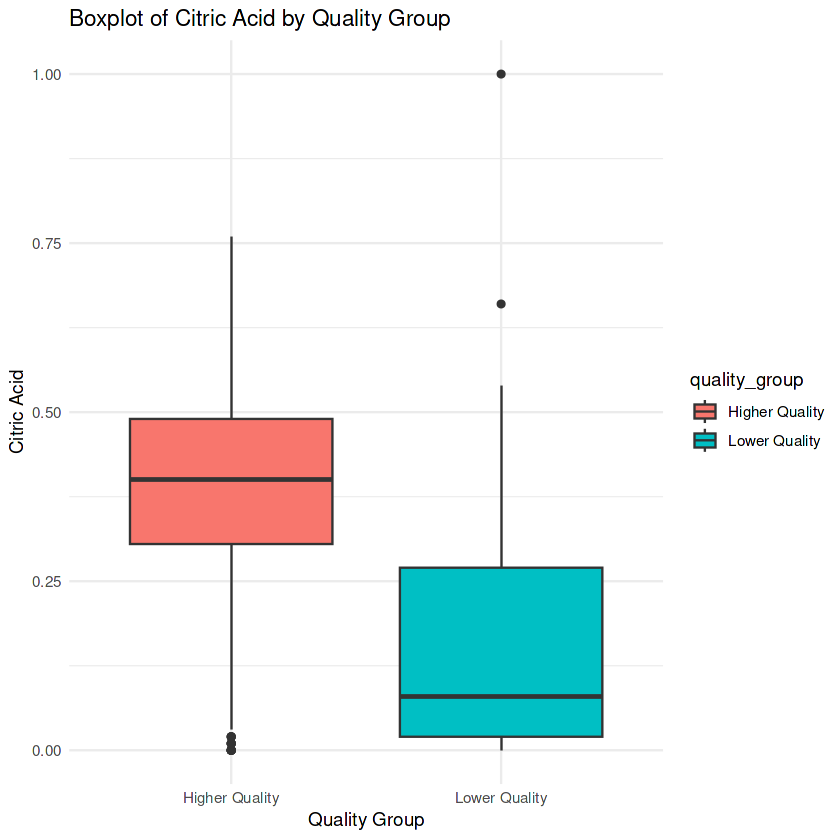

In [8]:
t.test(`citric acid` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)


ggplot(wine_case_study_clean, aes(x = quality_group, y = `citric acid`, fill = quality_group)) +
  geom_boxplot() +
  labs(title = "Boxplot of Citric Acid by Quality Group", x = "Quality Group", y = "Citric Acid") +
  theme_minimal()



#### 4- Residual Sugar Welch’s t-test and Visuzaliation



	Welch Two Sample t-test

data:  residual sugar by quality_group
t = 0.14996, df = 88.233, p-value = 0.8811
alternative hypothesis: true difference in means between group Higher Quality and group Lower Quality is not equal to 0
95 percent confidence interval:
 -0.4371555  0.5085202
sample estimates:
mean in group Higher Quality  mean in group Lower Quality 
                    2.720603                     2.684921 


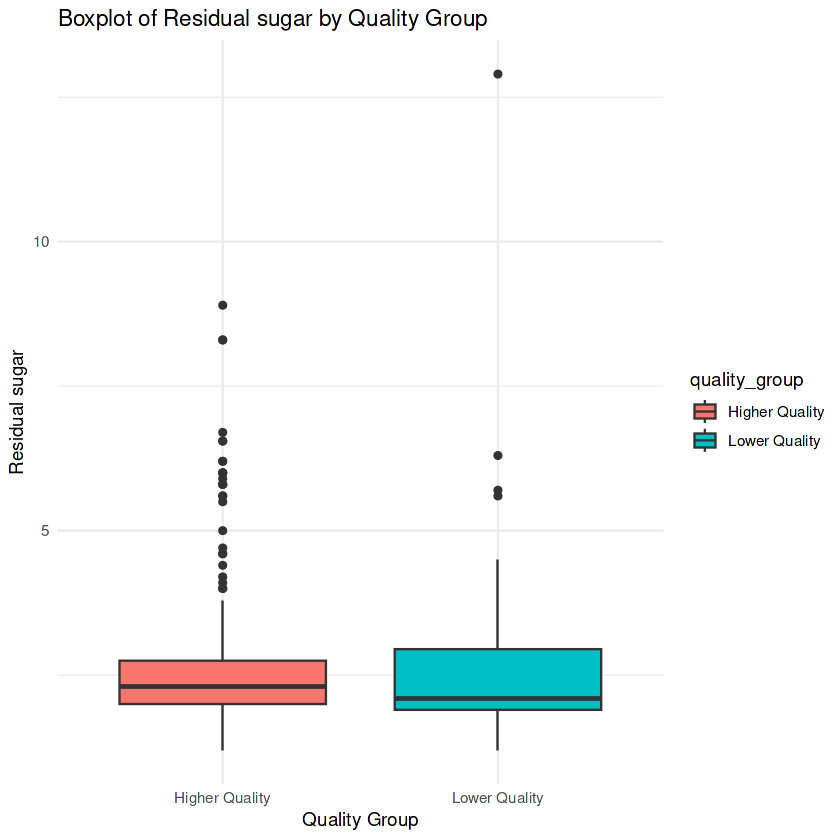

In [9]:

t.test(`residual sugar` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)

ggplot(wine_case_study_clean, aes(x = quality_group, y = `residual sugar`, fill = quality_group)) +
  geom_boxplot() +
  labs(title = "Boxplot of Residual sugar by Quality Group", x = "Quality Group", y = "Residual sugar") +
  theme_minimal()


#### 5- Chlorides Welch’s t-test and Visualization



	Welch Two Sample t-test

data:  free sulfur dioxide by quality_group
t = 1.4658, df = 115.43, p-value = 0.1454
alternative hypothesis: true difference in means between group Higher Quality and group Lower Quality is not equal to 0
95 percent confidence interval:
 -0.6962436  4.6597117
sample estimates:
mean in group Higher Quality  mean in group Lower Quality 
                    14.04523                     12.06349 


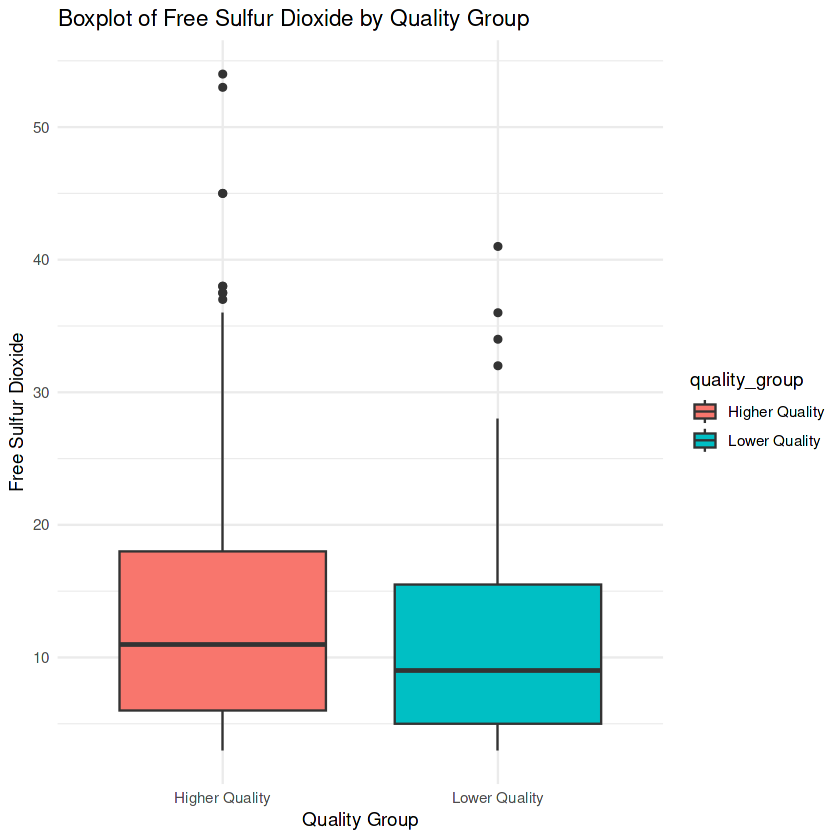

In [10]:

t.test(`free sulfur dioxide` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)

ggplot(wine_case_study_clean, aes(x = quality_group, y = `free sulfur dioxide`, fill = quality_group)) +
  geom_boxplot() +
  labs(title = "Boxplot of Free Sulfur Dioxide by Quality Group", x = "Quality Group", y = "Free Sulfur Dioxide") +
  theme_minimal()


#### 7- Total Sulfur Dioxide Welch’s t-test and Visualization



	Welch Two Sample t-test

data:  total sulfur dioxide by quality_group
t = 0.14131, df = 129.45, p-value = 0.8878
alternative hypothesis: true difference in means between group Higher Quality and group Lower Quality is not equal to 0
95 percent confidence interval:
 -7.483919  8.635231
sample estimates:
mean in group Higher Quality  mean in group Lower Quality 
                    35.02010                     34.44444 


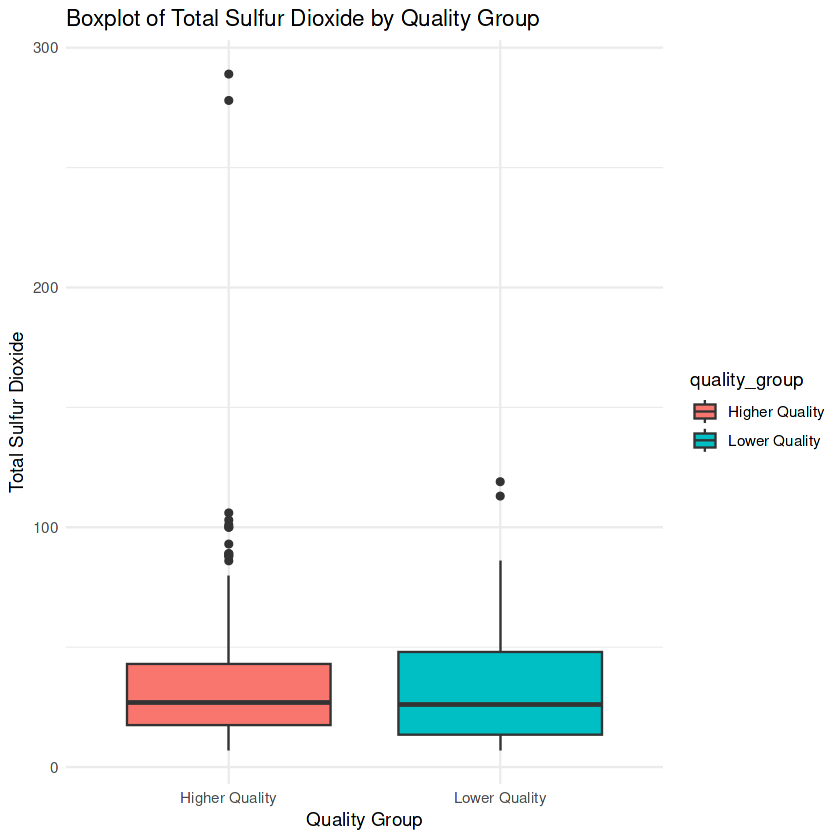

In [11]:

t.test(`total sulfur dioxide` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)

ggplot(wine_case_study_clean, aes(x = quality_group, y = `total sulfur dioxide`, fill = quality_group)) +
  geom_boxplot() +
  labs(title = "Boxplot of Total Sulfur Dioxide by Quality Group", x = "Quality Group", y = "Total Sulfur Dioxide") +
  theme_minimal()


#### 8- Density Welch’s t-test and Visualization



	Welch Two Sample t-test

data:  density by quality_group
t = -2.2432, df = 134.67, p-value = 0.02651
alternative hypothesis: true difference in means between group Higher Quality and group Lower Quality is not equal to 0
95 percent confidence interval:
 -1.099742e-03 -6.917542e-05
sample estimates:
mean in group Higher Quality  mean in group Lower Quality 
                   0.9961043                    0.9966887 


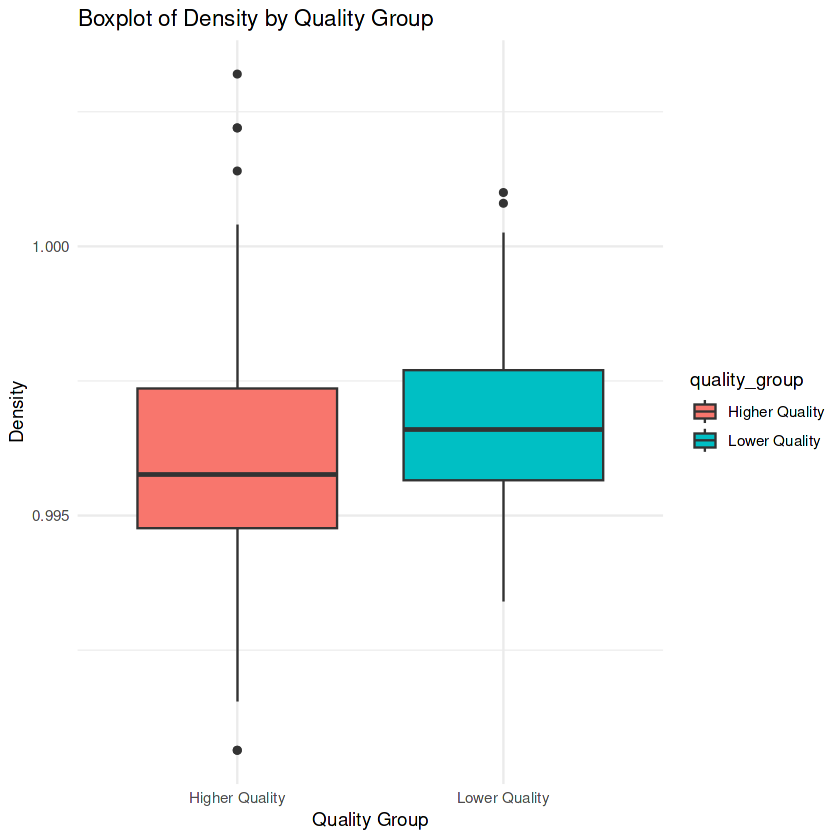

In [12]:

t.test(`density` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)

ggplot(wine_case_study_clean, aes(x = quality_group, y = `density`, fill = quality_group)) +
  geom_boxplot() +
  labs(title = "Boxplot of Density by Quality Group", x = "Quality Group", y = "Density") +
  theme_minimal()


#### 9- pH Welch’s t-test and Visualization



	Welch Two Sample t-test

data:  pH by quality_group
t = -3.8123, df = 92.633, p-value = 0.0002478
alternative hypothesis: true difference in means between group Higher Quality and group Lower Quality is not equal to 0
95 percent confidence interval:
 -0.14201314 -0.04473329
sample estimates:
mean in group Higher Quality  mean in group Lower Quality 
                    3.290754                     3.384127 


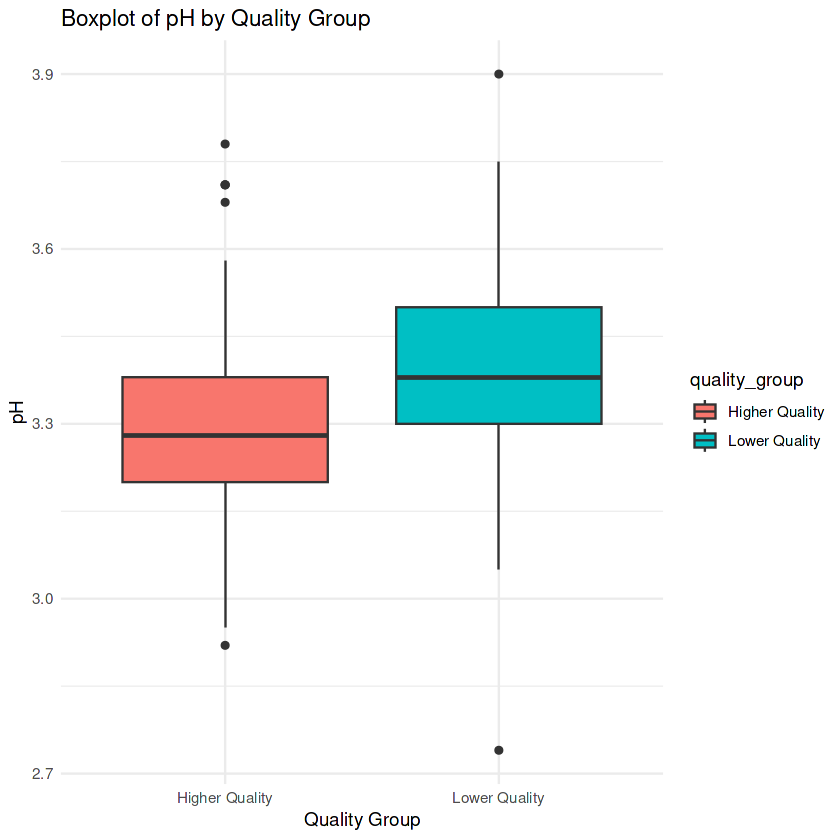

In [13]:

t.test(`pH` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)

ggplot(wine_case_study_clean, aes(x = quality_group, y = `pH`, fill = quality_group)) +
  geom_boxplot() +
  labs(title = "Boxplot of pH by Quality Group", x = "Quality Group", y = "pH") +
  theme_minimal()


#### 10- Sulphates Welch’s t-test and Visualization



	Welch Two Sample t-test

data:  sulphates by quality_group
t = 4.9923, df = 76.861, p-value = 3.632e-06
alternative hypothesis: true difference in means between group Higher Quality and group Lower Quality is not equal to 0
95 percent confidence interval:
 0.08958766 0.20848046
sample estimates:
mean in group Higher Quality  mean in group Lower Quality 
                   0.7412563                    0.5922222 


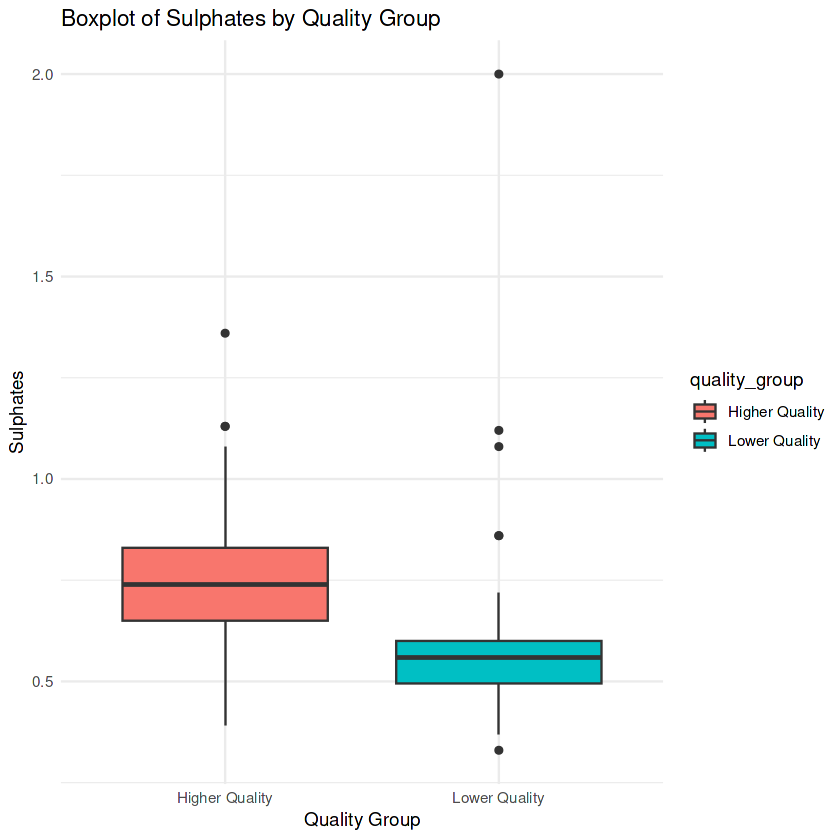

In [14]:

t.test(`sulphates` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)

ggplot(wine_case_study_clean, aes(x = quality_group, y = `sulphates`, fill = quality_group)) +
  geom_boxplot() +
  labs(title = "Boxplot of Sulphates by Quality Group", x = "Quality Group", y = "Sulphates") +
  theme_minimal()


#### 11- Alcohol Welch’s t-test and Visualization



	Welch Two Sample t-test

data:  alcohol by quality_group
t = 9.3091, df = 108.47, p-value = 1.675e-15
alternative hypothesis: true difference in means between group Higher Quality and group Lower Quality is not equal to 0
95 percent confidence interval:
 0.9838834 1.5161964
sample estimates:
mean in group Higher Quality  mean in group Lower Quality 
                    11.46591                     10.21587 


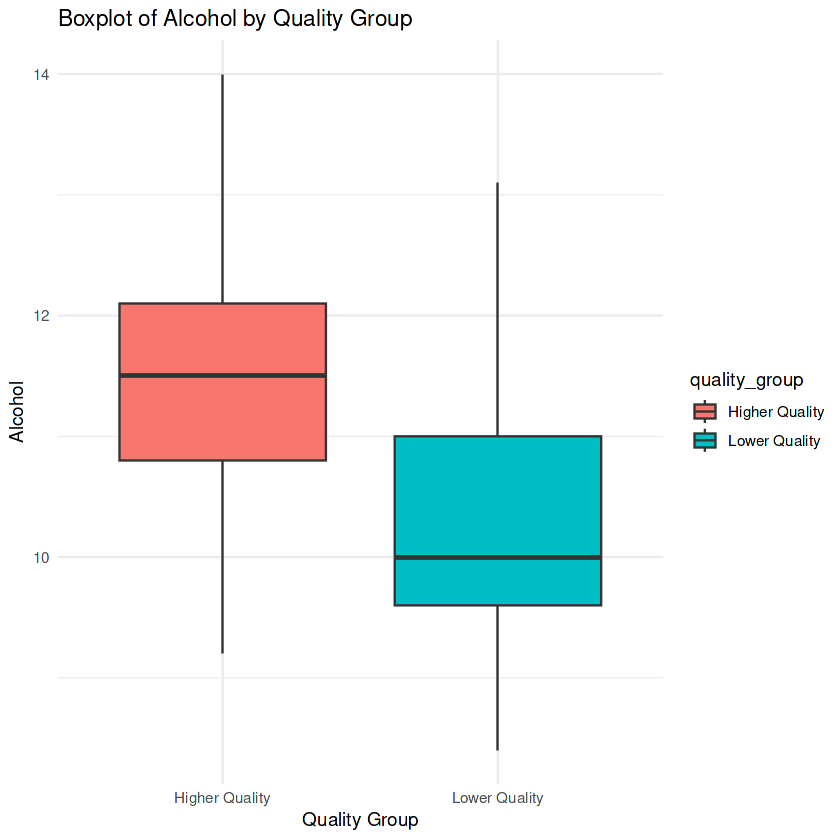

In [15]:

t.test(`alcohol` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)

ggplot(wine_case_study_clean, aes(x = quality_group, y = `alcohol`, fill = quality_group)) +
  geom_boxplot() +
  labs(title = "Boxplot of Alcohol by Quality Group", x = "Quality Group", y = "Alcohol") +
  theme_minimal()


#### Applying The Benjamini-Hochberg Procedure for p-values correction


In [16]:

#storing all the p-values in one variable
p_values <- c(
  t.test(`fixed acidity` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value,
  t.test(`volatile acidity` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value,
  t.test(`citric acid` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value,
  t.test(`residual sugar` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value,
  t.test(`chlorides` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value,
  t.test(`free sulfur dioxide` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value,
  t.test(`total sulfur dioxide` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value,
  t.test(`density` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value,
  t.test(`pH` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value,
  t.test(`sulphates` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value,
  t.test(`alcohol` ~ quality_group, data = wine_case_study_clean, var.equal = FALSE)$p.value
)
print(p_values)
#apllying bh correction for p-values
bh_p_values <- p.adjust(p_values, method = "BH")
print(bh_p_values)


 [1] 1.147885e-04 5.294647e-15 7.258785e-10 8.811353e-01 5.231517e-02
 [6] 1.454319e-01 8.878434e-01 2.651460e-02 2.478236e-04 3.631804e-06
[11] 1.675324e-15


 [1] 2.525346e-04 2.912056e-14 2.661555e-09 8.878434e-01 7.193336e-02
 [6] 1.777500e-01 8.878434e-01 4.166580e-02 4.543432e-04 9.987461e-06
[11] 1.842856e-14


## 5. Results

#### Creating one dataframe with all p-values results

In [17]:

#creating the variable  attibutes for dataframe

attributes <- c("fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
                "density", "pH", "sulphates", "alcohol")

#creating variables with the t-tests and BH test results
reject_h0_bh_test <- ifelse(bh_p_values <= 0.05, "Reject H₀", "Fail to Reject H₀")
reject_h0_ttest <- ifelse(p_values <= 0.05, "Reject H₀", "Fail to Reject H₀")

#creating table with results
p_value_results <-data.frame(
  factors = attributes,
  bh_p_values = bh_p_values,
  t_test_p_values = p_values,
  reject_h0_bh_test = reject_h0_bh_test,
  reject_h0_ttest = reject_h0_ttest)

datatable(p_value_results)


HTML widgets cannot be represented in plain text (need html)

#### 5.a Results interpretation

##### 5.a.1. Fixed Acidity
  The comparison of fixed acidity between higher and lower-quality wines showed a statistically significant difference (p = 0.000198). This indicates that the null hypothesis, which posited no difference in fixed acidity between the two groups, was rejected. The higher-quality wines had a mean fixed acidity of 8.86, compared to 7.87 in lower-quality wines, suggesting that fixed acidity may influence wine quality.

#####  5.a.2. Volatile Acidity
  A significant difference was observed in volatile acidity between the higher and lower-quality wines (p = 5.311e-15). The null hypothesis was rejected, with the higher-quality wines having a lower mean volatile acidity (0.40) compared to lower-quality wines (0.72). This suggests that lower volatile acidity could be a characteristic associated with higher wine quality.

#####  5.a.3. Citric Acid
  For citric acid, a significant difference was found between the two groups (p = 1.84e-09). The null hypothesis was rejected. Higher-quality wines had a mean citric acid content of 0.37, while lower-quality wines had 0.17. This indicates that higher citric acid content could be linked to higher wine quality.

#####  5.a.4. Residual Sugar
  Residual sugar showed no significant difference between higher and lower-quality wines (p = 0.8956). The null hypothesis was not rejected, indicating that residual sugar does not appear to have a significant impact on wine quality in this dataset.

#####  5.a.5. Chlorides
  Chlorides also showed no significant difference between the two quality groups (p = 0.05707). The null hypothesis was not rejected, suggesting that chloride content is not a key factor distinguishing higher and lower-quality wines in this sample.

#####  5.a.6. Free Sulfur Dioxide
  No significant difference was found in free sulfur dioxide between the two groups (p = 0.1674). The null hypothesis was not rejected, indicating that free sulfur dioxide levels are not a significant factor in determining wine quality in this study.

#####  5.a.7. Total Sulfur Dioxide
  Similarly, total sulfur dioxide did not show a significant difference between higher and lower-quality wines (p = 0.8153). The null hypothesis was not rejected, suggesting that total sulfur dioxide does not influence wine quality in this dataset.

#####  5.a.8. Density
  A significant difference was found in density between the higher and lower-quality wines (p = 0.01834). The null hypothesis was rejected, with higher-quality wines having a slightly lower mean density (0.9961) compared to lower-quality wines (0.9967), indicating that density could play a role in determining wine quality.

#####  5.a.9. pH
  The pH levels also differed significantly between the two quality groups (p = 0.0002718). The null hypothesis was rejected. Higher-quality wines had a mean pH of 3.29, while lower-quality wines had a pH of 3.38. This suggests that pH may be another factor contributing to wine quality.

#####  5.a.10. Sulphates
  A significant difference was observed in sulphates between the two groups (p = 3.484e-06). The null hypothesis was rejected, with higher-quality wines having a higher mean sulphate content (0.74) compared to lower-quality wines (0.59). This suggests that sulphate content may be a contributing factor to higher wine quality.

#####  5.a.11. Alcohol
  Alcohol content was significantly higher in higher-quality wines (mean = 11.49) compared to lower-quality wines (mean = 10.22), with a p-value of 1.26e-15. The null hypothesis was rejected, indicating that alcohol content is likely a key factor influencing wine quality.

## 6. Discussion

  The results of the p-values demonstrated that the differences in the quality ratings provided by wine experts may be influenced by the physicochemical properties of the wines. These properties are known to affect wine taste, and the data presented in this study support this relationship. For example, alcohol content was higher in wines with higher quality ratings, and the null hypothesis was rejected for this property. This suggests that alcohol content could influence the taste and might be a preference for wine experts when evaluating wine quality. However, this study does not address human tasting preferences in depth, which could provide more detailed insights into the factors that drive expert evaluations. Further research into sensory analysis could offer a more comprehensive understanding of how these physicochemical properties are perceived in the context of wine tasting.

## 7. conclusion

  The rejection of the null hypothesis for several properties implies that these physicochemical characteristics could be critical factors for wine experts when assessing quality. Further research is needed to better understand the role of these properties in the wine tasting process, and to explore potential interactions between the various physicochemical factors.

In conclusion, this study provides valuable insights into the physicochemical attributes that contribute to wine quality, which could help producers improve their product and guide consumers in making more informed wine choices.


## 8. References

Grand View Research. 2024. U.S. Wine Market Size, Share & Trends Analysis Report. Accessed March 8, 2025. https://www.grandviewresearch.com/industry-analysis/us-wine-market.

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Retrieved from https://people.stat.sc.edu/hoyen/STAT540/Exam/Wine.pdf
